In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#import the dataset stored in drive
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.shape

(47692, 2)

**Preprocessing Stage**

In [4]:
#unique categories 
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [5]:
#check whether dataset has null values 
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
#check number of records per category.
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [7]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#preprocessing the input features
ps = PorterStemmer()
corpus=[]
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
for i in range(len(df)):
  text = re.sub(r"(?:\@|https?\://)\S+", "", df['tweet_text'][i])
  text = re.sub(r'[^\x00-\x7f]',r'', text)
  text = re.sub("\s\s+" , " ", text)
  text = remove_emoji(text)
  text= " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
  text = " ".join(word.strip() for word in re.split('#|_', text)) #remove hashtag middle of sentence
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = text.split()
  text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)
df['tweet_clean']=corpus

In [9]:
df['tweet_clean']

0                           word katandandr food crapilici
1                                           aussietv white
2                           classi whore red velvet cupcak
3        meh p thank head concern anoth angri dude twitter
4        isi account pretend kurdish account like islam...
                               ...                        
47687    black ppl expect anyth depend anyth yet free p...
47688    turner withhold disappoint turner call court a...
47689    swear god dumb nigger bitch got bleach hair re...
47690    yea fuck rt your nigger fuck unfollow fuck dum...
47691    bro u gotta chill rt dog fuck kp dumb nigger b...
Name: tweet_clean, Length: 47692, dtype: object

In [10]:
tweet_len = []
for text in df['tweet_clean']:
  tweet_len.append(len(text.split()))
df['tweet_len']=tweet_len

In [11]:
df['tweet_len']

0         4
1         2
2         5
3         9
4         8
         ..
47687    21
47688    29
47689    13
47690    10
47691    12
Name: tweet_len, Length: 47692, dtype: int64

In [12]:
df['tweet_clean'].duplicated().sum()

3236

In [13]:
df.drop_duplicates('tweet_clean',inplace=True)

In [14]:
df['cyberbullying_type'].value_counts()

religion               7939
age                    7876
ethnicity              7751
not_cyberbullying      7582
gender                 7567
other_cyberbullying    5741
Name: cyberbullying_type, dtype: int64

In [15]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

religion             7939
age                  7876
ethnicity            7751
not_cyberbullying    7582
gender               7567
Name: cyberbullying_type, dtype: int64

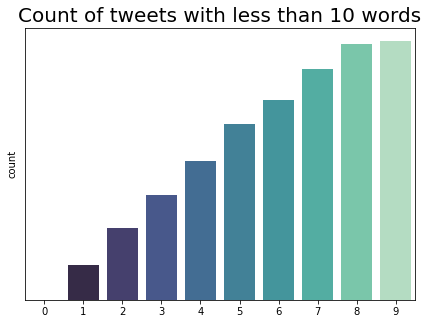

In [16]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='tweet_len', data=df[df['tweet_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [17]:
df.sort_values(by="tweet_len",ascending=False)

,tweet_text,cyberbullying_type,tweet_clean,tweet_len
44035,You so black and white trying to live like a n...,ethnicity,black white tri live like nigger pahahahaha co...,188
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb ass nigger bitch lt whore smh ...,165
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilti kill feel guilti enjoy torment sin...,139
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,research push import top anti bulli program us...,139
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,ethnicity,sooo mad rt fuck obama dumb nigger go switzerl...,128
...,...,...,...,...
5069,@Louie__88 weres it at,not_cyberbullying,were,1
1672,@halalflaws @AMohedin @islamdefense @haroonsty...,not_cyberbullying,say,1
8979,@BlackOpal80 I'm blocked.,gender,block,1
227,@EvvyKube not sure.,not_cyberbullying,sure,1


In [18]:
df = df[df['tweet_len']>3]
df = df[df['tweet_len'] < 100]

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Label'] = le.fit_transform(df['cyberbullying_type'])

In [20]:
df

,tweet_text,cyberbullying_type,tweet_clean,tweet_len,Label
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici,4,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,5,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter,9,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...,8,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,ye test god good bad indiffer weird whatev pro...,11,3
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl expect anyth depend anyth yet free p...,21,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappoint turner call court a...,29,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,13,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt your nigger fuck unfollow fuck dum...,10,1


In [21]:
from wordcloud import WordCloud, STOPWORDS

In [22]:
print(le.classes_)

['age' 'ethnicity' 'gender' 'not_cyberbullying' 'religion']


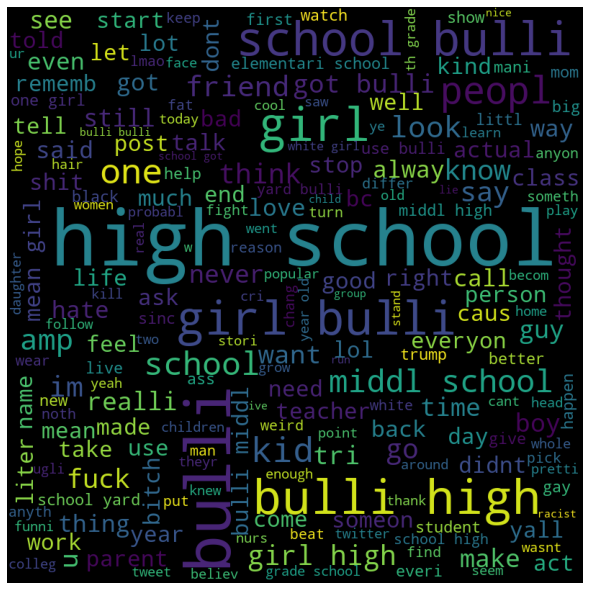

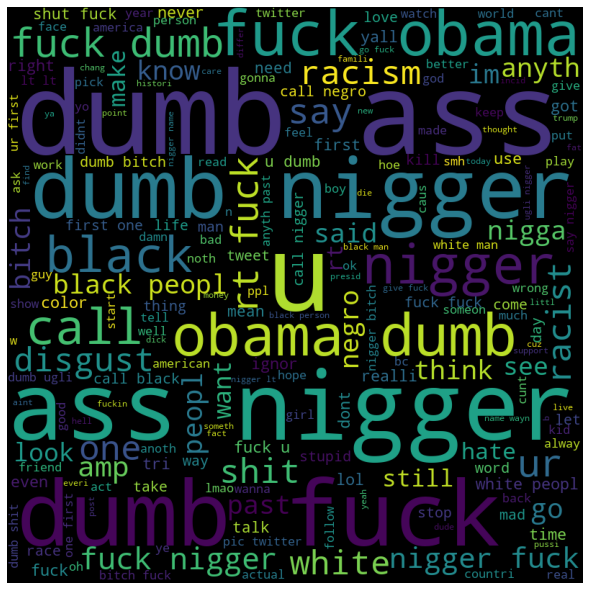

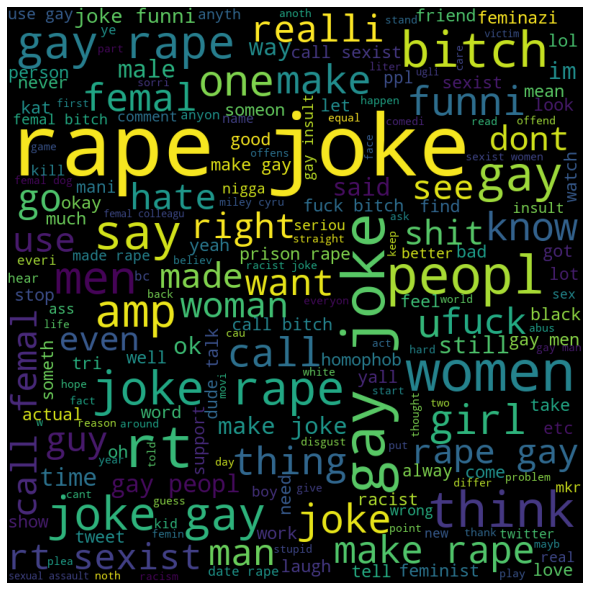

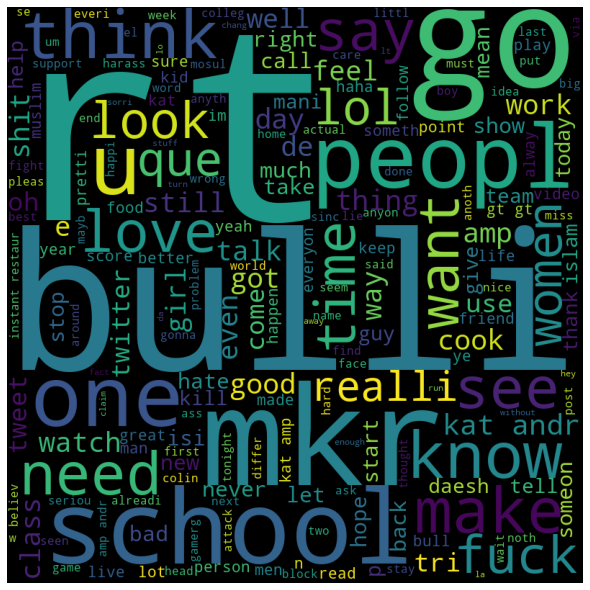

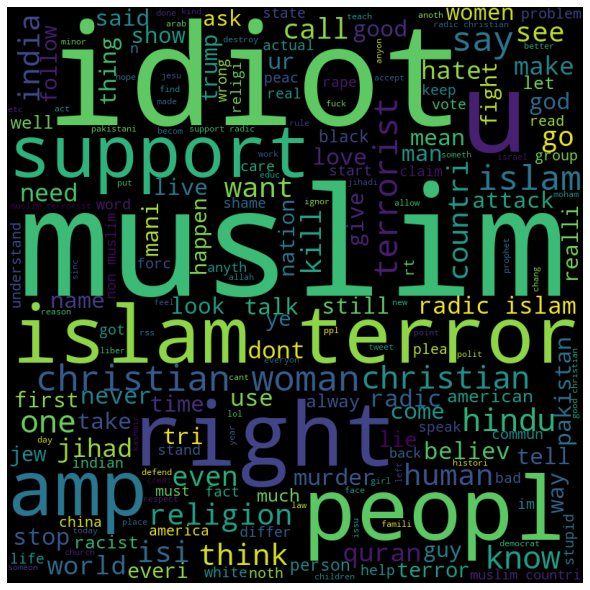

In [23]:
for c in range(len(le.classes_)):
    string = ""
    for i in df[df.Label == c].tweet_clean.values:
        string = string + " " + i.strip()
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(string)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['tweet_clean']).toarray()

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv).toarray()

In [25]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**Naive Bayes Using TfIdf**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['Label'], test_size=0.20, stratify=df['cyberbullying_type'], random_state=42)

In [27]:
y_train.value_counts()

4    6308
0    6260
1    6170
2    5790
3    4932
Name: Label, dtype: int64

**Upsampling**

In [28]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[0] != vc[4]) or (vc[0] !=  vc[2]) or (vc[0] !=  vc[3]) or (vc[0] !=  vc[1]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()
y_train.value_counts()

1    6308
3    6308
4    6308
2    6308
0    6308
Name: Label, dtype: int64

In [32]:
accuracy={}
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_tf_pred = gnb.predict(X_test)
print("Accuracy Score")
print(accuracy_score(y_test,gnb_tf_pred))
print("classification Report")
print(classification_report(y_test,gnb_tf_pred))
accuracy['Naive Bayes with TfIdf']=accuracy_score(y_test,gnb_tf_pred)

Accuracy Score
0.506856754921928
classification Report
              precision    recall  f1-score   support

           0       0.51      0.32      0.40      1565
           1       0.72      0.65      0.68      1543
           2       0.36      0.76      0.48      1447
           3       0.45      0.34      0.39      1233
           4       0.73      0.45      0.56      1577

    accuracy                           0.51      7365
   macro avg       0.55      0.50      0.50      7365
weighted avg       0.56      0.51      0.51      7365



**Multinomial Naive Bayes**

In [33]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

In [34]:
nb_pred = nb_clf.predict(X_test)
print(accuracy_score(y_test,nb_pred))

0.8562118126272913


In [35]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1565
           1       0.91      0.91      0.91      1543
           2       0.88      0.86      0.87      1447
           3       0.84      0.51      0.63      1233
           4       0.86      0.96      0.90      1577

    accuracy                           0.86      7365
   macro avg       0.86      0.84      0.84      7365
weighted avg       0.86      0.86      0.85      7365



<AxesSubplot:>

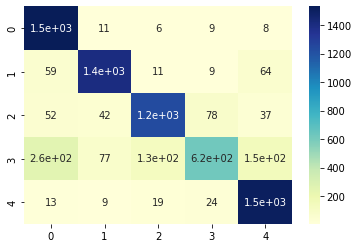

In [36]:
cf = confusion_matrix(y_test,nb_pred)
sns.heatmap(cf,annot=True,cmap="YlGnBu")


In [37]:
import pickle
pickle.dump(nb_clf, open('/kaggle/working/model.pkl', 'wb'))

In [38]:
df[df['cyberbullying_type']=='ethnicity']['tweet_clean'][:10]

39731    hey dumb fuck celeb stop someth peopl public f...
39732           fuck u bitch rt fuck obama dumb ass nigger
39733    joe racist mani video audio clip racist shit s...
39734    truck look dumb fuck tri make look wors countr...
39735                       nigger food cafe today disgust
39736    muthafucka still ego trip fool fuck damn ego l...
39737    play dumb fuck yo littl white ass nigger chain...
39738    say fear suspicion call nigger nigga negro poi...
39739    oh look dumb nigger ghost acct fuck dumb mothe...
39740    bitch dumb talk bout dew said say nigger nigga...
Name: tweet_clean, dtype: object

**Testing Analysis**

In [39]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity'],
      dtype=object)

In [40]:
df['Label'].unique()

array([3, 2, 4, 0, 1])

In [43]:
X=df[['tweet_text','tweet_clean','Label']]
Y=df['cyberbullying_type']
X

,tweet_text,tweet_clean,Label
0,"In other words #katandandre, your food was cra...",word katandandr food crapilici,3
2,@XochitlSuckkks a classy whore? Or more red ve...,classi whore red velvet cupcak,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",meh p thank head concern anoth angri dude twitter,3
4,@RudhoeEnglish This is an ISIS account pretend...,isi account pretend kurdish account like islam...,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",ye test god good bad indiffer weird whatev pro...,3
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",black ppl expect anyth depend anyth yet free p...,1
47688,Turner did not withhold his disappointment. Tu...,turner withhold disappoint turner call court a...,1
47689,I swear to God. This dumb nigger bitch. I have...,swear god dumb nigger bitch got bleach hair re...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,yea fuck rt your nigger fuck unfollow fuck dum...,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=df['cyberbullying_type'], random_state=42)

In [48]:
df_test = X_test
df_test['Class'] = Y
df_test

,tweet_text,tweet_clean,Label,Class
21785,Does being proud Hindu means hating Muslims? I...,proud hindu mean hate muslim definit idiot pla...,4,religion
37334,she looks like the kind of girl that would've ...,look like kind girl would bulli high school tb...,0,age
33074,I want to tell the 10-year-old girl who was bu...,want tell year old girl bulli ostrac choic mus...,0,age
32496,i hate when girls i went to high school with t...,hate girl went high school tri sell stuff face...,0,age
45183,@ghostfacekillah Dumb ass niggers who fuck wit...,dumb ass nigger fuck bout get pluck,1,ethnicity
...,...,...,...,...
7725,@crazybbbitch Haha. Give me better than that. ...,haha give better classi broad,3,not_cyberbullying
7225,#juegosdecolegio Cuando me encerraban en el ar...,juegosdecolegio cuando encerraban en el armari...,3,not_cyberbullying
6394,the worst menu in #mkr history,worst menu mkr histori,3,not_cyberbullying
38987,Do tall girls actually get bullied like this? ...,tall girl actual get bulli like one high schoo...,0,age


In [52]:
classes = []
for i in nb_pred:
    if i==1:
        classes.append('ethnicity')
    elif i==2:
        classes.append('gender')
    elif i==3:
        classes.append('not_cyberbullying')
    elif i==4:
        classes.append('religon')
    else:
        classes.append('age')


In [54]:
df_test['Predicted']=classes
df_test.head(10)

,tweet_text,tweet_clean,Label,Class,Predicted
21785,Does being proud Hindu means hating Muslims? I...,proud hindu mean hate muslim definit idiot pla...,4,religion,religon
37334,she looks like the kind of girl that would've ...,look like kind girl would bulli high school tb...,0,age,age
33074,I want to tell the 10-year-old girl who was bu...,want tell year old girl bulli ostrac choic mus...,0,age,age
32496,i hate when girls i went to high school with t...,hate girl went high school tri sell stuff face...,0,age,age
45183,@ghostfacekillah Dumb ass niggers who fuck wit...,dumb ass nigger fuck bout get pluck,1,ethnicity,ethnicity
18735,@TheDemocrats have embraced radical Islam. How...,embrac radic islam american jew support beyond...,4,religion,religon
47578,@DoonSquad5 @Datpiffhomie @king_5quad hey nigg...,hey nigger dooner spell calisthen wrong dumb fuck,1,ethnicity,ethnicity
47159,excessive police brutality experienced by *pea...,excess polic brutal experienc peac protestor p...,1,ethnicity,religon
33976,Even if you aren't an outsider you're not welc...,even outsid welcom berat peopl interest either...,0,age,age
13993,@danieltosh it says alot about a person when y...,say alot person googl name daniel tosh gay imm...,2,gender,gender
